In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


Loading data...
Preprocessing data...

Dataset Information:

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     200 non-null    object        
 1   CustomerName   200 non-null    object        
 2   Region         200 non-null    object        
 3   SignupDate     200 non-null    datetime64[ns]
 4   LifetimeValue  199 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 7.9+ KB
None

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: f

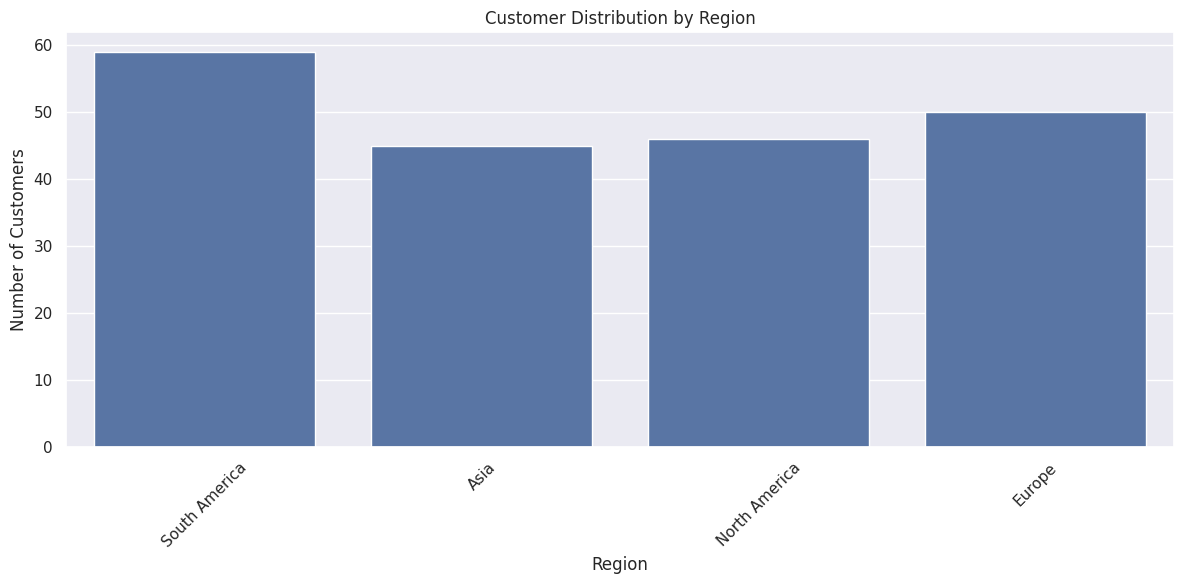

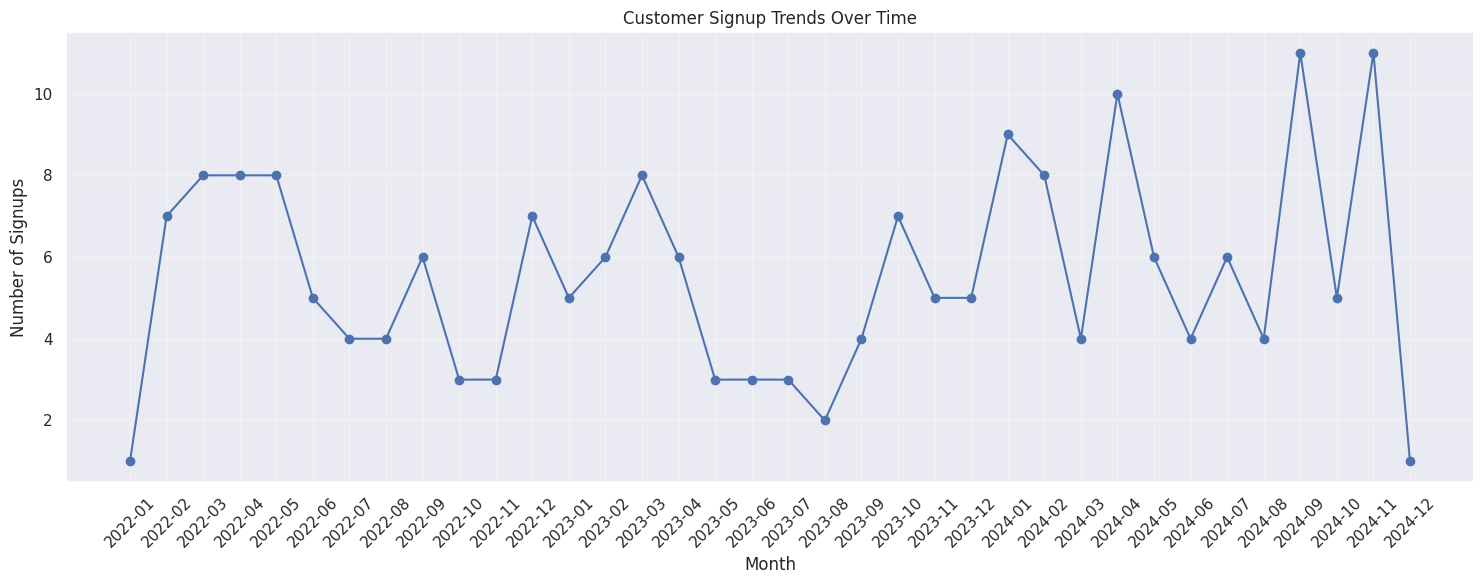

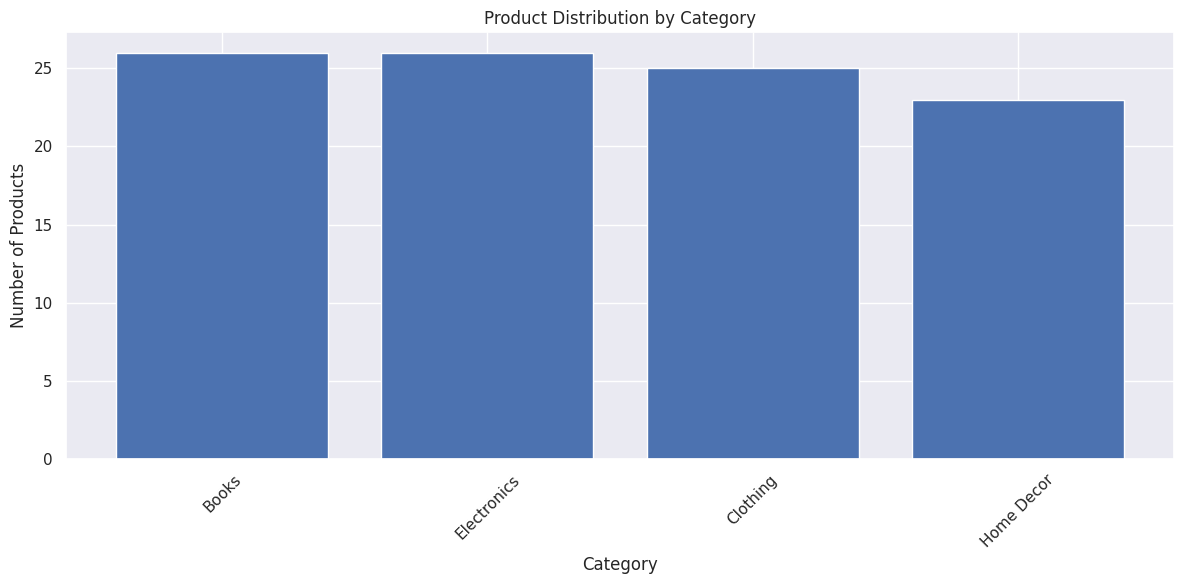

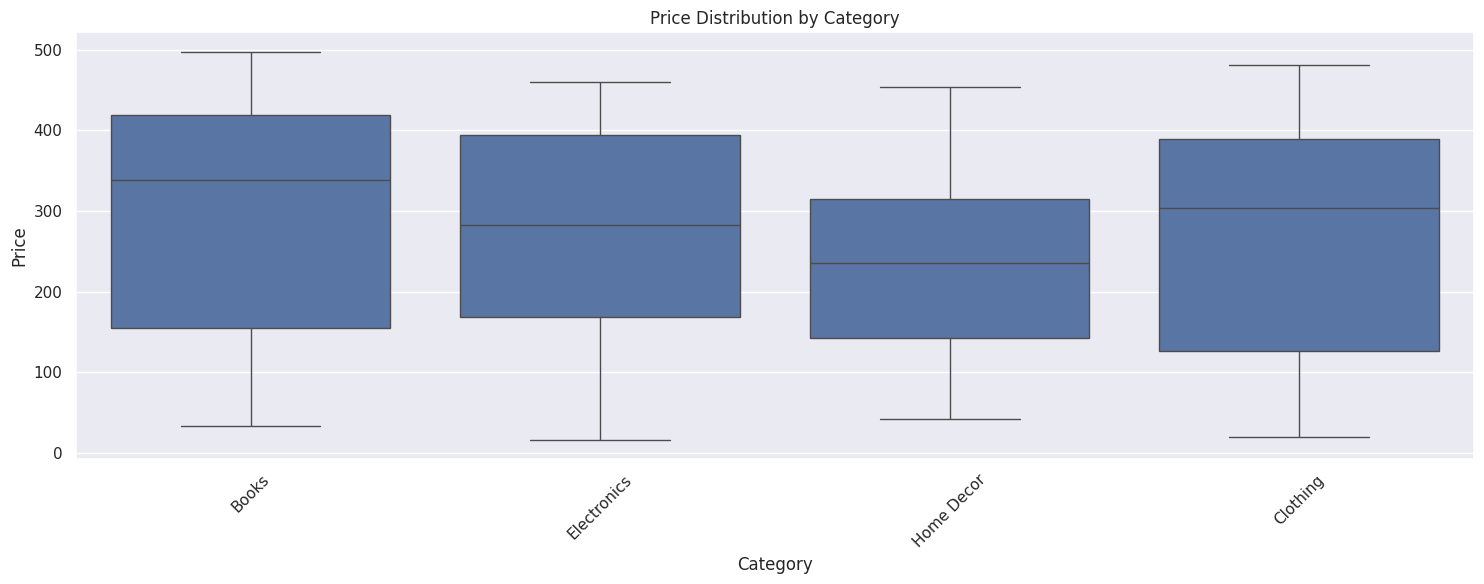

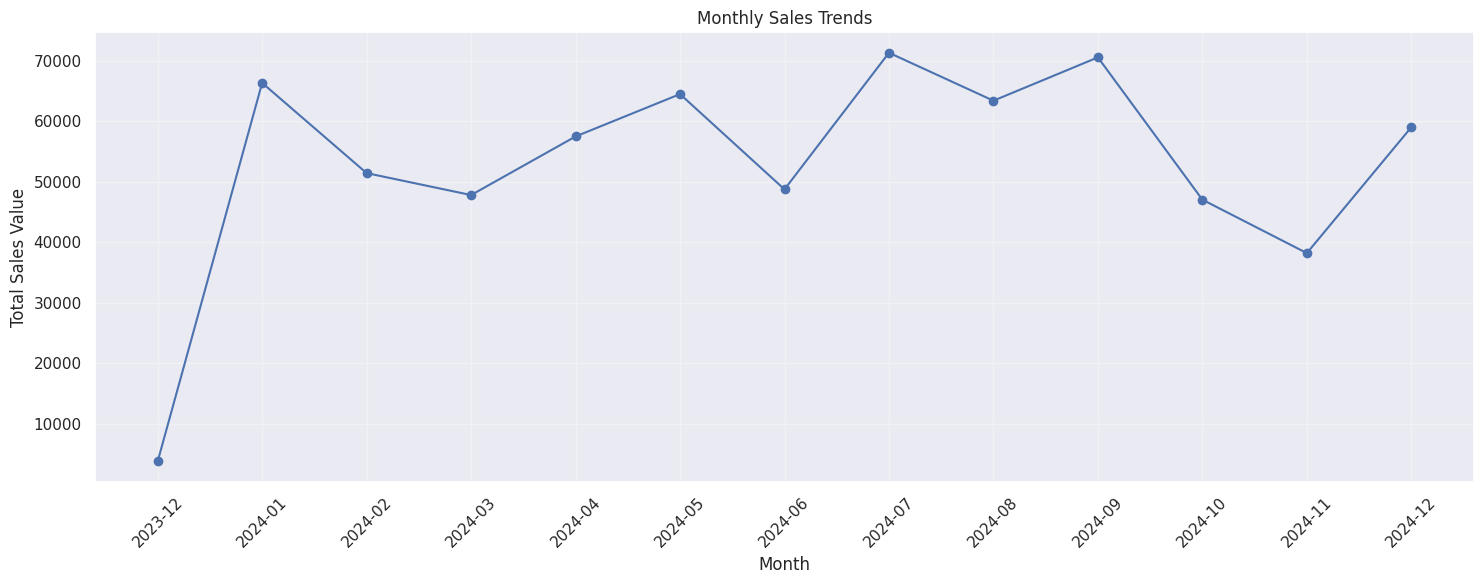

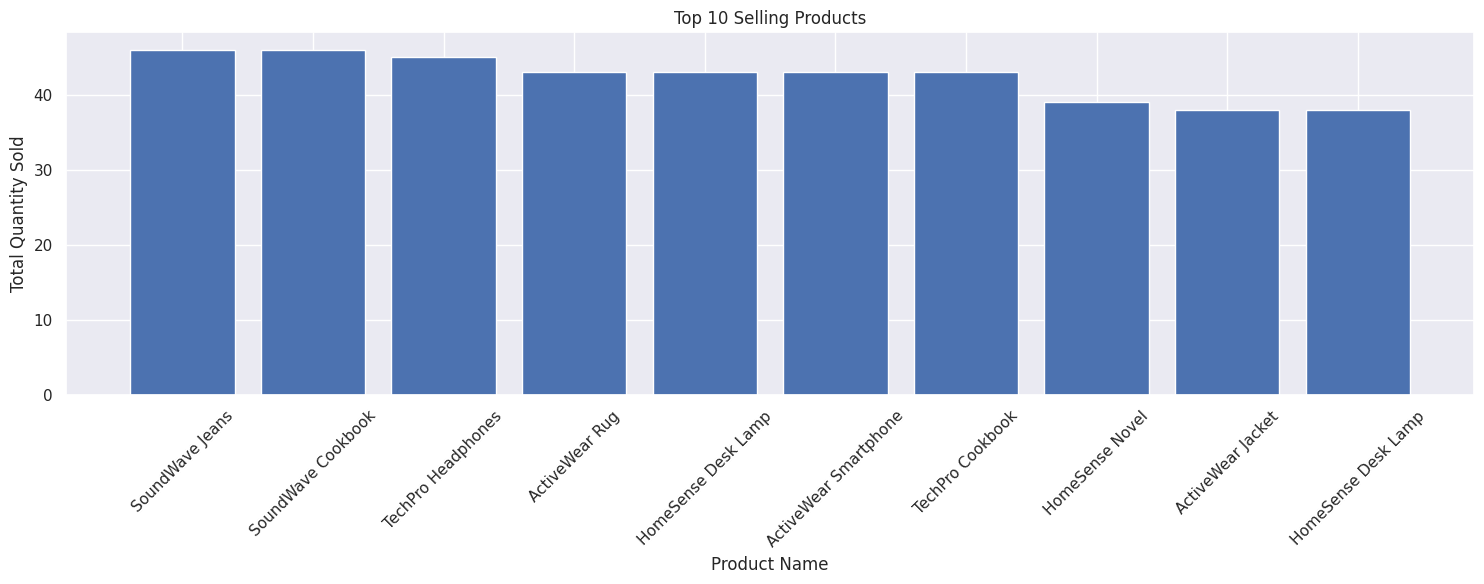


Generating business insights...

1. Customer Lifetime Value by Region:
                  mean  count        sum
Region                                  
Asia           3456.25     44  152074.97
Europe         3325.09     50  166254.63
North America  3311.16     46  152313.40
South America  3717.84     59  219352.56

2. Revenue by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

3. Customer Purchase Frequency Statistics:
count    199.000000
mean       5.025126
std        2.198340
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       11.000000
dtype: float64

4. Average Monthly Sales:
TransactionMonth
1     620.34
2     668.30
3     597.86
4     668.83
5     750.32
6     706.83
7     743.40
8     674.86
9     735.46
10    672.33
11    670.60
12    766.08
Name: TotalValue, dtype: float64

5. Customer Retention Statistics:
count    199.00
mean     224

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import drive
import os
plt.style.use('default')
sns.set_theme()
customers_df = None
products_df = None
transactions_df = None

def load_data():
    """Load data from CSV files and store in global variables"""
    global customers_df, products_df, transactions_df
    customers_df = pd.read_csv('/content/gdrive/My Drive/Customers.csv')
    products_df = pd.read_csv('/content/gdrive/My Drive/Products.csv')
    transactions_df = pd.read_csv('/content/gdrive/My Drive/Transactions.csv')
    return customers_df, products_df, transactions_df
def preprocess_data():
    """Preprocess the loaded data"""
    global customers_df, products_df, transactions_df
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
    transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.month
    transactions_df['TransactionYear'] = transactions_df['TransactionDate'].dt.year
    customer_ltv = transactions_df.groupby('CustomerID')['TotalValue'].sum().reset_index()
    customer_ltv.columns = ['CustomerID', 'LifetimeValue']
    customers_df = customers_df.merge(customer_ltv, on='CustomerID', how='left')
def analyze_customer_demographics():
    """Analyze and visualize customer demographics"""
    global customers_df
    plt.figure(figsize=(12, 6))
    sns.countplot(data=customers_df, x='Region')
    plt.title('Customer Distribution by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(15, 6))
    signup_trends = customers_df['SignupDate'].dt.to_period('M').value_counts().sort_index()
    plt.plot(range(len(signup_trends)), signup_trends.values, marker='o')
    plt.title('Customer Signup Trends Over Time')
    plt.xlabel('Month')
    plt.ylabel('Number of Signups')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(len(signup_trends)), signup_trends.index, rotation=45)
    plt.tight_layout()
    plt.show()
def analyze_product_insights():
    """Analyze and visualize product insights"""
    global products_df
    plt.figure(figsize=(12, 6))
    category_counts = products_df['Category'].value_counts()
    plt.bar(category_counts.index, category_counts.values)
    plt.title('Product Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Products')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='Category', y='Price', data=products_df)
    plt.title('Price Distribution by Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
def analyze_transaction_patterns():
    """Analyze and visualize transaction patterns"""
    global transactions_df, products_df
    plt.figure(figsize=(15, 6))
    monthly_sales = transactions_df.groupby(
        transactions_df['TransactionDate'].dt.to_period('M')
    )['TotalValue'].sum()
    plt.plot(range(len(monthly_sales)), monthly_sales.values, marker='o')
    plt.title('Monthly Sales Trends')
    plt.xlabel('Month')
    plt.ylabel('Total Sales Value')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(len(monthly_sales)), monthly_sales.index, rotation=45)
    plt.tight_layout()
    plt.show()
    top_products = (transactions_df.groupby('ProductID')['Quantity']
                   .sum()
                   .sort_values(ascending=False)
                   .head(10))
    top_products = top_products.reset_index().merge(
        products_df[['ProductID', 'ProductName']],
        on='ProductID'
    )
    plt.figure(figsize=(15, 6))
    plt.bar(range(len(top_products)), top_products['Quantity'])
    plt.title('Top 10 Selling Products')
    plt.xlabel('Product Name')
    plt.ylabel('Total Quantity Sold')
    plt.xticks(range(len(top_products)), top_products['ProductName'], rotation=45)
    plt.tight_layout()
    plt.show()
def generate_business_insights():
    """Generate business insights from the analyzed data"""
    global customers_df, products_df, transactions_df
    avg_ltv_by_region = customers_df.groupby('Region')['LifetimeValue'].agg(['mean', 'count', 'sum']).round(2)
    print("\n1. Customer Lifetime Value by Region:")
    print(avg_ltv_by_region)
    product_revenue = transactions_df.groupby('ProductID')['TotalValue'].sum().reset_index()
    product_revenue = product_revenue.merge(products_df[['ProductID', 'Category']], on='ProductID')
    category_revenue = product_revenue.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
    print("\n2. Revenue by Category:")
    print(category_revenue)
    purchase_frequency = transactions_df.groupby('CustomerID').size().describe()
    print("\n3. Customer Purchase Frequency Statistics:")
    print(purchase_frequency)
    seasonal_trends = transactions_df.groupby('TransactionMonth')['TotalValue'].mean().round(2)
    print("\n4. Average Monthly Sales:")
    print(seasonal_trends)

    customer_transactions = transactions_df.groupby('CustomerID').agg({
        'TransactionDate': ['min', 'max', 'count']
    }).reset_index()
    customer_transactions.columns = ['CustomerID', 'FirstPurchase', 'LastPurchase', 'NumberOfTransactions']
    customer_transactions['DaysBetweenFirstLast'] = (
        pd.to_datetime(customer_transactions['LastPurchase']) -
        pd.to_datetime(customer_transactions['FirstPurchase'])
    ).dt.days

    print("\n5. Customer Retention Statistics:")
    print(customer_transactions['DaysBetweenFirstLast'].describe().round(2))

    return {
        'avg_ltv_by_region': avg_ltv_by_region,
        'category_revenue': category_revenue,
        'purchase_frequency': purchase_frequency,
        'seasonal_trends': seasonal_trends,
        'retention_stats': customer_transactions['DaysBetweenFirstLast'].describe()
    }

def main():
    """Main function to run the analysis"""
    print("Loading data...")
    load_data()
    print("Preprocessing data...")
    preprocess_data()
    print("\nDataset Information:")
    print("\nCustomers Dataset:")
    print(customers_df.info())
    print("\nProducts Dataset:")
    print(products_df.info())
    print("\nTransactions Dataset:")
    print(transactions_df.info())
    print("\nGenerating visualizations...")
    analyze_customer_demographics()
    analyze_product_insights()
    analyze_transaction_patterns()
    print("\nGenerating business insights...")
    insights = generate_business_insights()

    return insights

if __name__ == "__main__":
    insights = main()